In [22]:
import pandas as pd
df = pd.read_csv('Housing.csv')
print("DataFrame loaded successfully.")
df.head()

DataFrame loaded successfully.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [24]:
print("Identifying and converting categorical features")
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()

Identifying and converting categorical features


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [4]:
y = df['price']
X = df.drop('price', axis=1)

print("Target variable 'y' and feature variables 'X' defined successfully.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
print(X.head())
print("First 5 values of y:")
print(y.head())

Target variable 'y' and feature variables 'X' defined successfully.
Shape of X: (545, 13)
Shape of y: (545,)
First 5 rows of X:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  \
0                0                1        2         1   
1                0                1        3         0   
2                0                0        2         1   
3                0                1        3         1   
4                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                      

In [5]:
from sklearn.model_selection import train_test_split

print("Splitting data into training and testing sets...")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Splitting data into training and testing sets...
Data split successfully.
Shape of X_train: (436, 13)
Shape of X_test: (109, 13)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train_simple = X_train[['area']]
X_test_simple = X_test[['area']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_simple, y_train)

print("Simple Linear Regression model trained successfully.")

y_pred_simple = simple_linear_model.predict(X_test_simple)

mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_simple:.2f}")
print(f"Mean Squared Error (MSE): {mse_simple:.2f}")
print(f"R-squared (R2): {r2_simple:.2f}")

Implementing Simple Linear Regression with 'area' as the feature...
Simple Linear Regression model trained successfully.

Simple Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
R-squared (R2): 0.27


In [12]:
print("Implementing Multiple Linear Regression with all features")
multiple_linear_model = LinearRegression()
multiple_linear_model.fit(X_train, y_train)

print("Multiple Linear Regression model trained successfully.")
y_pred_multiple = multiple_linear_model.predict(X_test)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
print("\nMultiple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_multiple:.2f}")
print(f"Mean Squared Error (MSE): {mse_multiple:.2f}")
print(f"R-squared (R²): {r2_multiple:.2f}")

Implementing Multiple Linear Regression with all features
Multiple Linear Regression model trained successfully.

Multiple Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R-squared (R²): 0.65


In [8]:
import matplotlib.pyplot as plt
print("Matplotlib imported successfully.")

Matplotlib imported successfully.


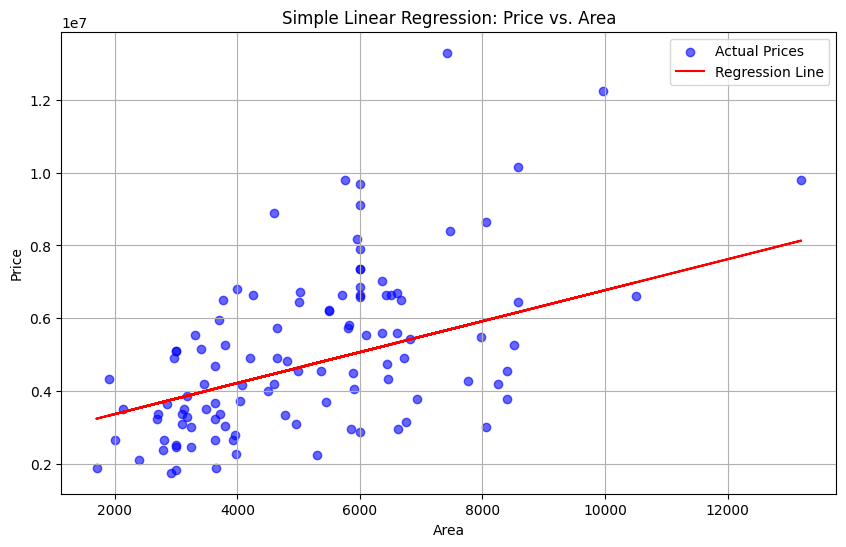

Scatter plot displayed successfully.


In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.plot(X_test_simple, y_pred_simple, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print("Scatter plot displayed successfully.")

In [33]:
print(" Simple Linear Regression Coefficients")
print(f"Intercept: {simple_linear_model.intercept_:.2f}")
print(f"Coefficient for 'area': {simple_linear_model.coef_[0]:.2f}")

print(" \nMultiple Linear Regression Coefficients\n")
print(f"Intercept: {multiple_linear_model.intercept_:.2f}")

print("Coefficients for other features:")
for feature, coef in zip(X.columns, multiple_linear_model.coef_):
    print(f"{feature}: {coef:.2f}")

 Simple Linear Regression Coefficients
Intercept: 2512254.26
Coefficient for 'area': 425.73
 
Multiple Linear Regression Coefficients

Intercept: 260032.36
Coefficients for other features:
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
